In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv("Air_Quality.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Air_Quality.csv'

In [27]:
df.head()

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000


In [28]:
df.shape

(52704, 10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [30]:
df.describe()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,52704.000000,9648.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,258.258121,462.348259,24.102998,12.569869,60.025729,17.689931,35.643143,41.349339
std,159.589953,33.769009,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149
min,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000
25%,159.000000,445.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000
50%,213.000000,453.000000,18.900000,5.700000,54.000000,12.500000,18.900000,31.270835
75%,306.000000,467.000000,33.400000,16.800000,78.000000,23.000000,37.500000,57.702089
max,2045.000000,884.000000,165.900000,239.700000,349.000000,129.500000,543.900000,196.633330


In [31]:
df.describe(include=object)

,Date,City
count,52704,52704
unique,8784,6
top,2024-12-31 07:00:00+00:00,Brasilia
freq,6,8784


In [32]:
df['City'].unique()

array(['Brasilia', 'Cairo', 'Dubai', 'London', 'New York', 'Sydney'],
      dtype=object)

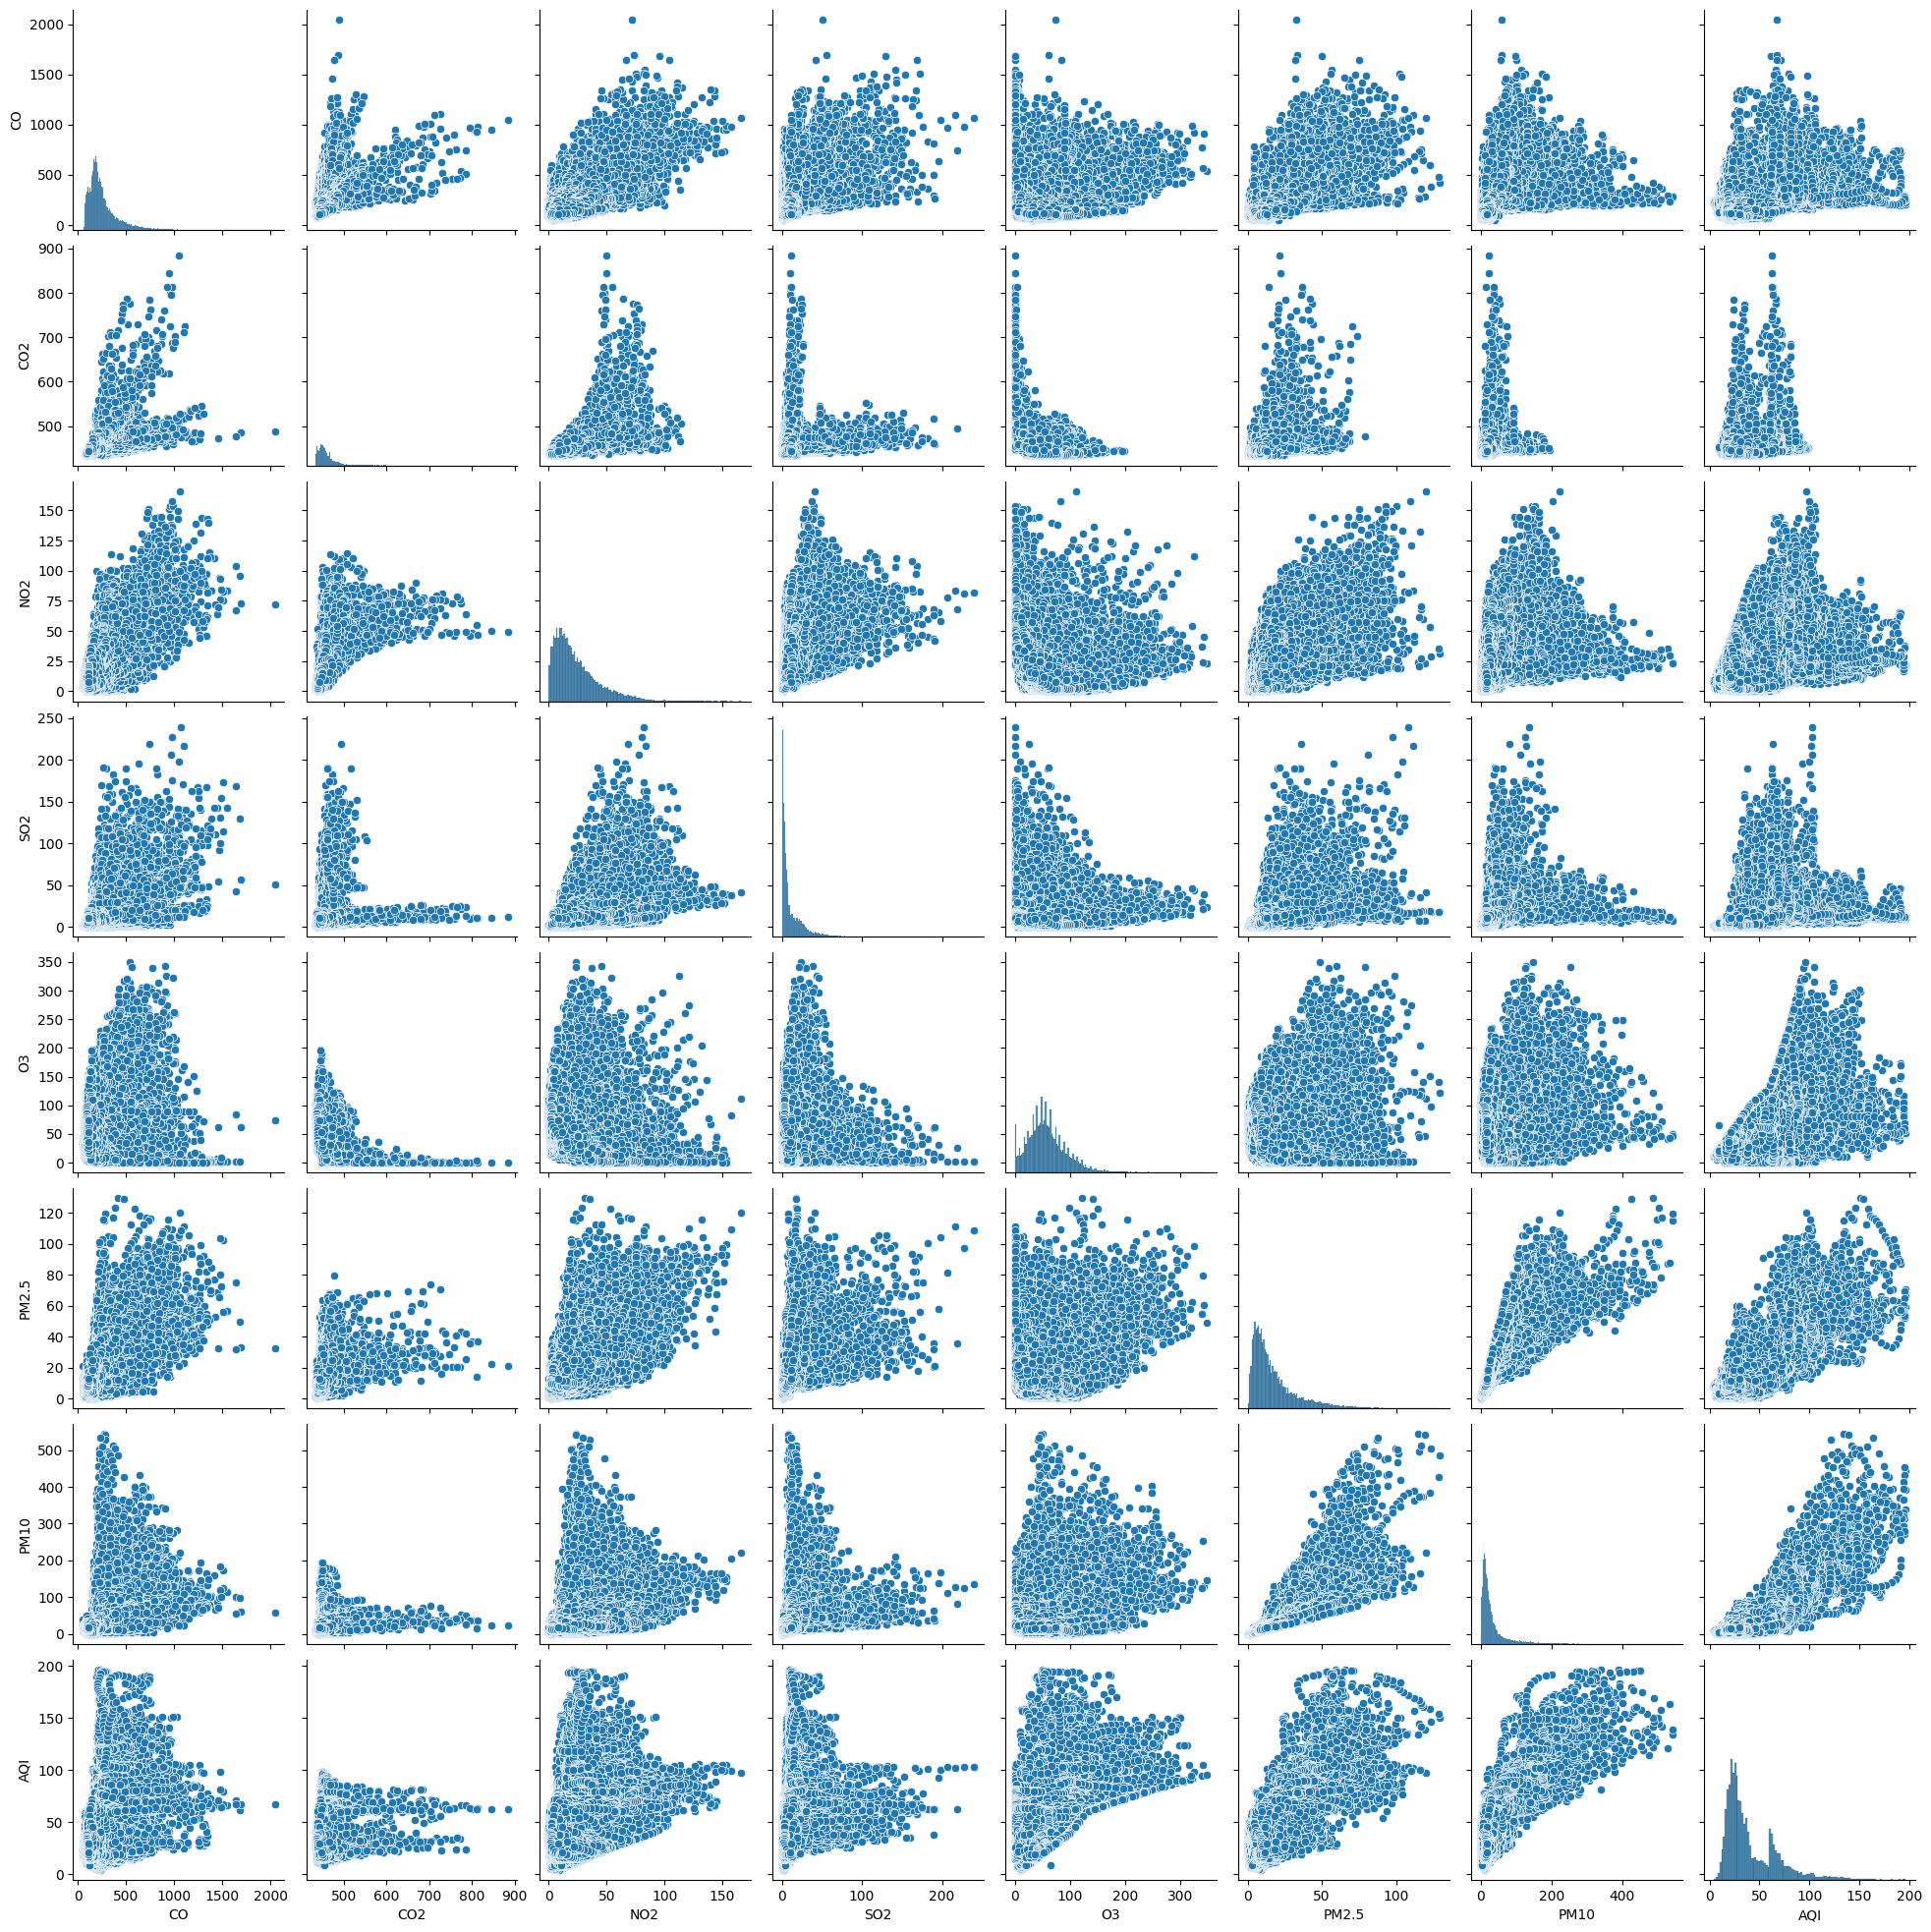

In [33]:
sns.pairplot(df)

### Analyse de la variable C02

In [34]:
df.groupby('City')['CO2'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Brasilia,1608.0,445.726368,7.895301,434.0,440.0,444.0,450.0,478.0
Cairo,1608.0,457.920398,14.008794,440.0,449.0,454.0,462.0,553.0
Dubai,1608.0,463.778607,15.426869,442.0,452.0,461.0,473.0,546.0
London,1608.0,475.114428,44.233857,435.0,450.0,458.0,482.0,786.0
New York,1608.0,488.358831,53.043219,440.0,457.0,471.0,494.0,884.0
Sydney,1608.0,443.190920,8.569290,434.0,437.0,440.0,446.0,488.0


Je constate que sur les 52704 valeurs observables, il y'a que 9648 de CO2.
Ce qui fait il y'a 43056 au total sans information de CO2.

Pour chaque ville, le nombre de C02 est indentique (1608) mais les concentrations diffèrentes. Et il manque 7176 valeurs de CO2.



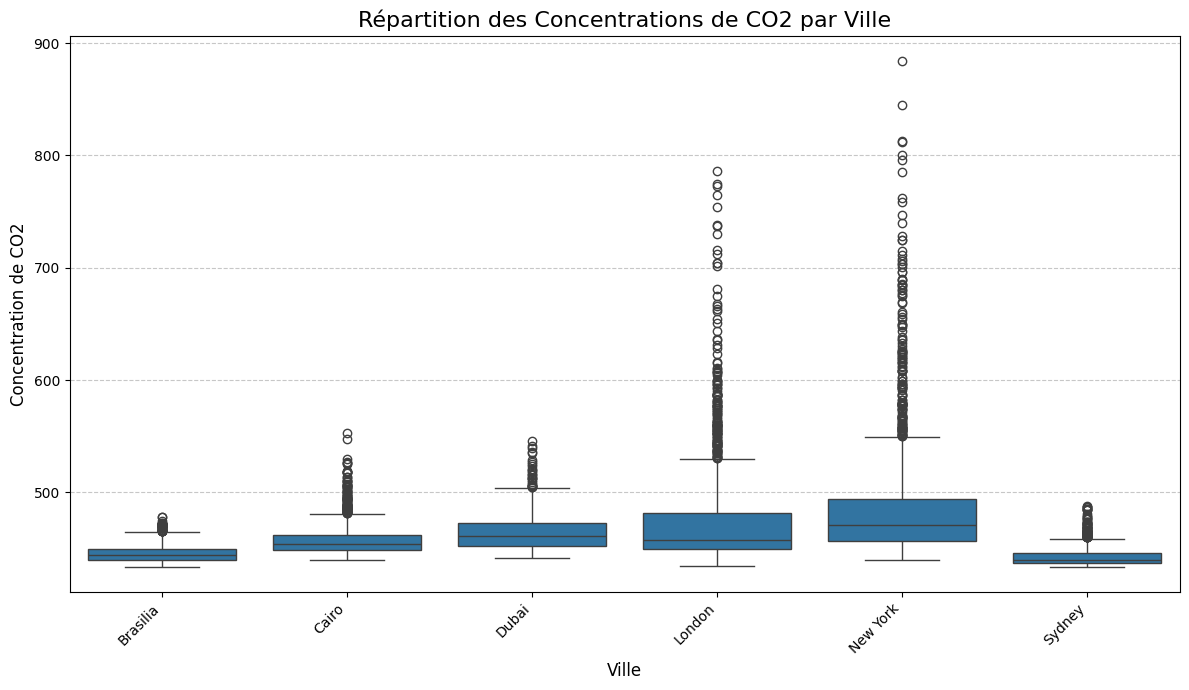

In [35]:
plt.figure(figsize=(12, 7)) # Taille du graphique
sns.boxplot(x='City', y='CO2', data=df)
plt.title('Répartition des Concentrations de CO2 par Ville', fontsize=16)
plt.xlabel('Ville', fontsize=12)
plt.ylabel('Concentration de CO2', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Ajout d'une grille sur l'axe y
plt.xticks(rotation=45, ha='right') # Rotation des étiquettes des villes pour éviter le chevauchement
plt.tight_layout() # Ajuste le layout pour éviter que les étiquettes soient coupées
plt.show()

In [36]:
df_numeric = df.select_dtypes(include=np.number)

In [37]:
df_numeric.head()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000


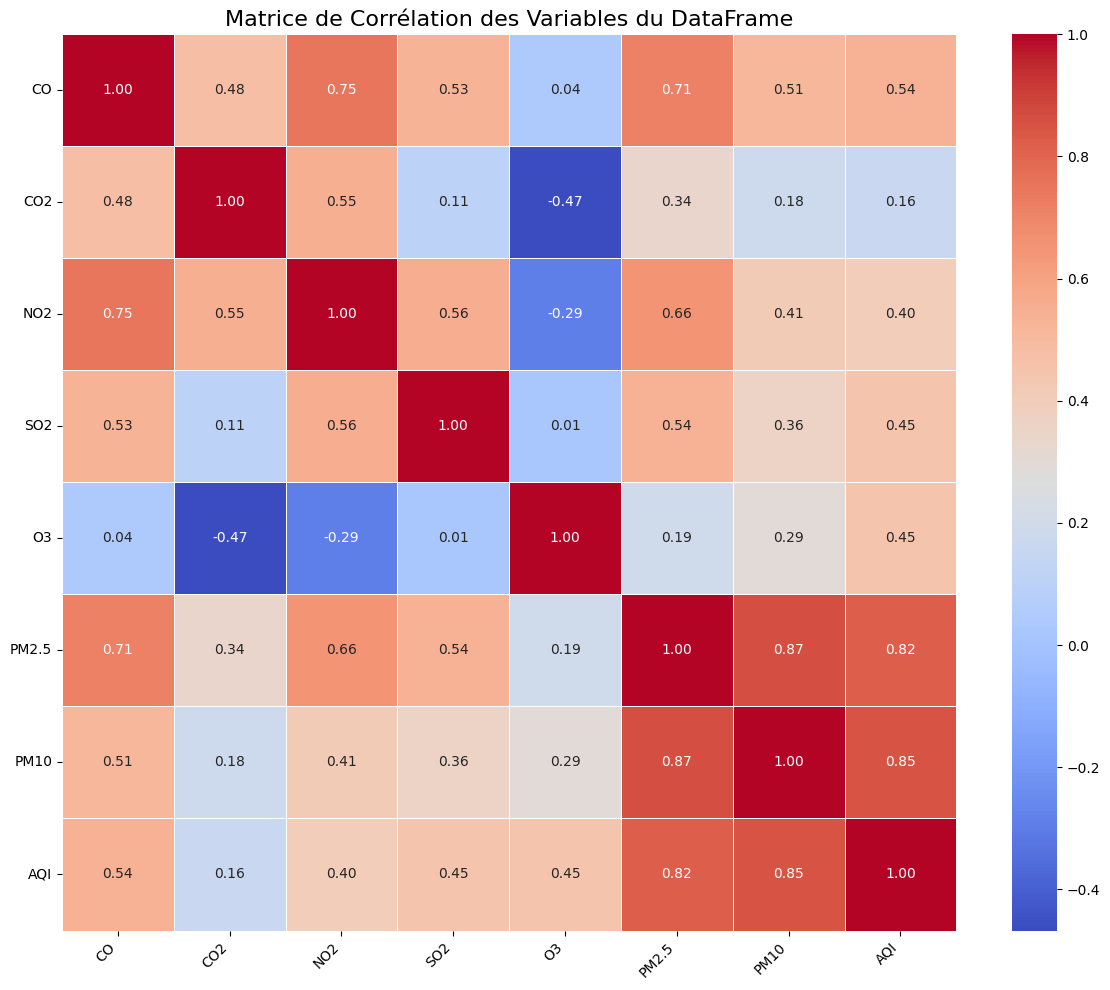

In [38]:
# Matrice de corrélation

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10)) # Ajustez la taille selon le nombre de variables

sns.heatmap(
    correlation_matrix,
    annot=True,      # Affiche les valeurs de corrélation sur la heatmap
    cmap='coolwarm', # Palette de couleurs (coolwarm, viridis, plasma, YlGnBu, RdBu_r, etc.)
    fmt=".2f",       # Formatage des nombres (2 décimales)
    linewidths=.5    # Lignes entre les cellules
)

plt.title('Matrice de Corrélation des Variables du DataFrame', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.yticks(rotation=0)             # Rotation des étiquettes de l'axe y
plt.tight_layout() # Ajuste le layout pour éviter que les étiquettes soient coupées
plt.show()

(https://www.historique-meteo.net/moyen-orient/egypte/)

## Données de Londres

In [1]:
df_ln = pd.read_csv('london_Air_Quality.csv')

NameError: name 'pd' is not defined

In [40]:
df_ln.head()

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,162.0,NaN,4.7,1.0,65.0,3.5,7.3,9.070833
1,2024-01-01 01:00:00+00:00,163.0,NaN,4.6,1.2,63.0,3.5,6.0,25.200000
2,2024-01-01 02:00:00+00:00,157.0,NaN,4.3,1.1,64.0,3.3,5.9,25.599998
3,2024-01-01 03:00:00+00:00,156.0,NaN,4.4,1.1,64.0,3.1,5.7,25.599998
4,2024-01-01 04:00:00+00:00,157.0,NaN,4.6,1.1,65.0,2.9,5.7,26.000000


In [116]:
df_ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8784 non-null   object 
 1   CO      8784 non-null   float64
 2   CO2     1608 non-null   float64
 3   NO2     8784 non-null   float64
 4   SO2     8784 non-null   float64
 5   O3      8784 non-null   float64
 6   PM2.5   8784 non-null   float64
 7   PM10    8784 non-null   float64
 8   AQI     8784 non-null   float64
dtypes: float64(8), object(1)
memory usage: 617.8+ KB


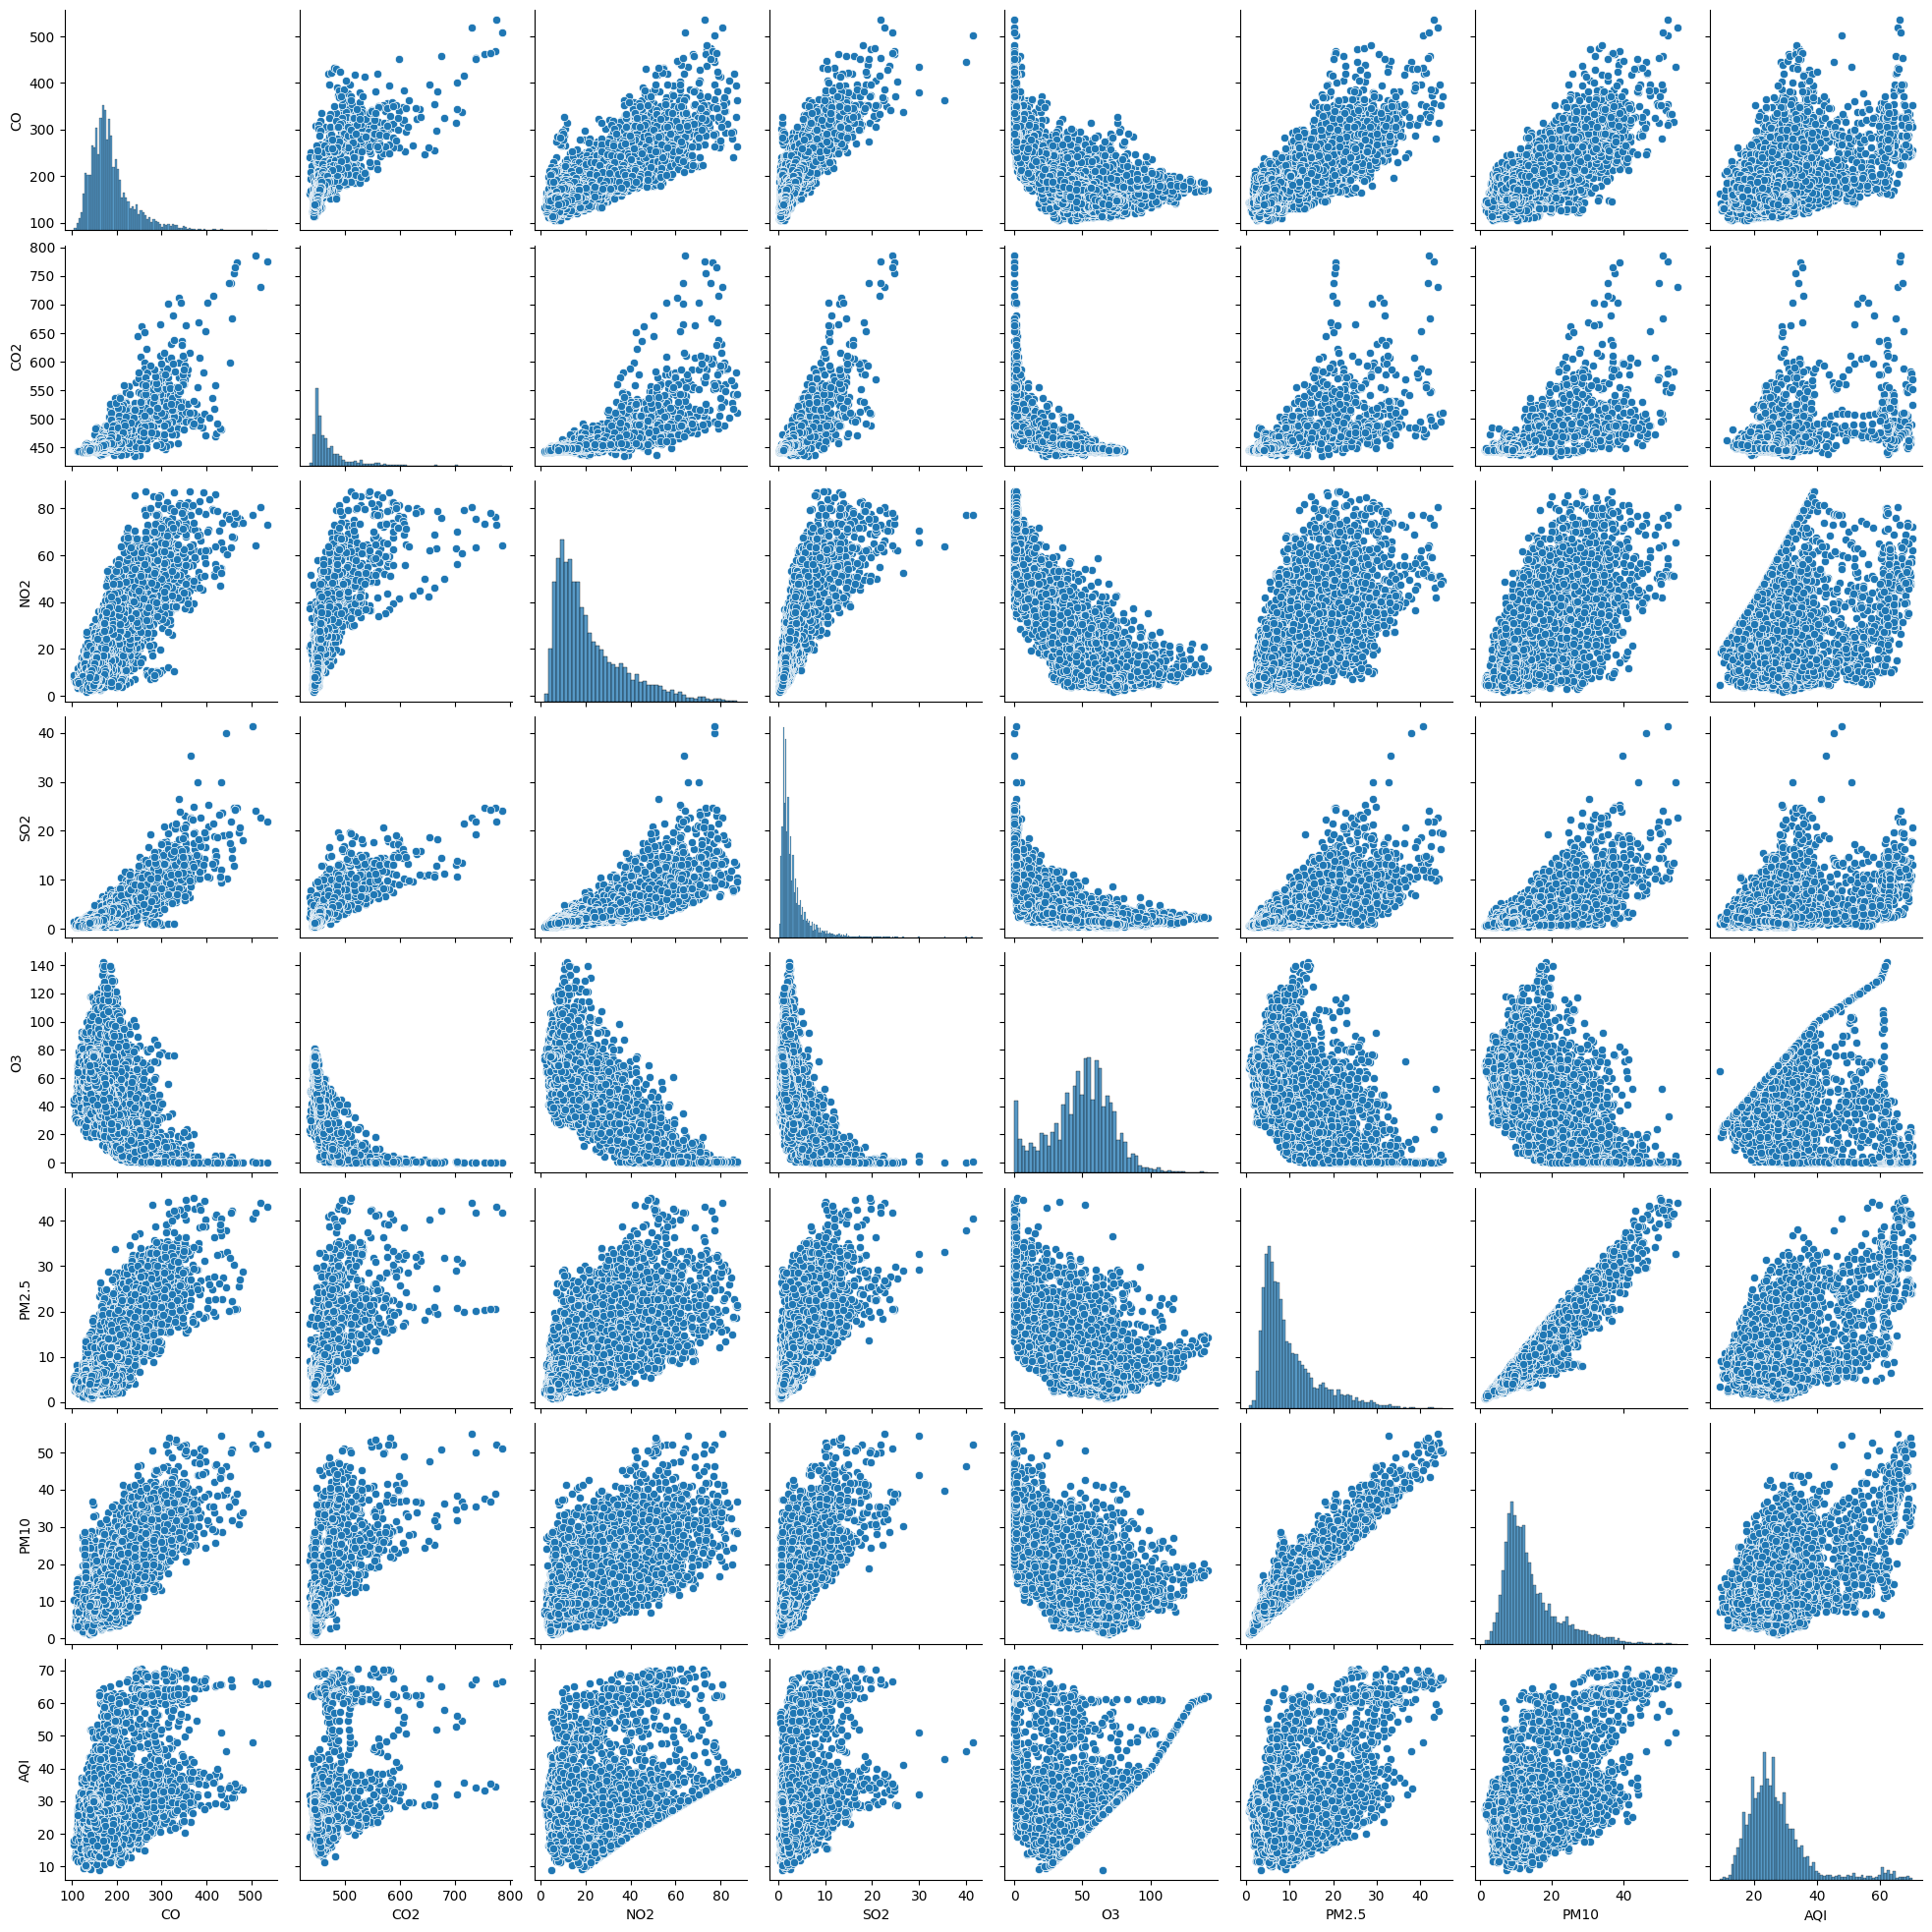

In [119]:
sns.pairplot(df_ln)

In [117]:
#Conversion de Date en type datetime
df_ln['Date'] = pd.to_datetime(df_ln['Date'])

In [118]:
# Séparer la colonne 'date' en 'DATE' et 'TIME'

# Créer une nouvelle colonne pour la date
df_ln['DATE'] = df_ln['Date'].dt.date

# Créer une nouvelle colonne pour l'heure
df_ln['TIME'] = df_ln['Date'].dt.time

In [63]:
df_ln.head()

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI,DATE,TIME
0,2024-01-01 00:00:00+00:00,162.0,NaN,4.7,1.0,65.0,3.5,7.3,9.070833,2024-01-01,00:00:00
1,2024-01-01 01:00:00+00:00,163.0,NaN,4.6,1.2,63.0,3.5,6.0,25.200000,2024-01-01,01:00:00
2,2024-01-01 02:00:00+00:00,157.0,NaN,4.3,1.1,64.0,3.3,5.9,25.599998,2024-01-01,02:00:00
3,2024-01-01 03:00:00+00:00,156.0,NaN,4.4,1.1,64.0,3.1,5.7,25.599998,2024-01-01,03:00:00
4,2024-01-01 04:00:00+00:00,157.0,NaN,4.6,1.1,65.0,2.9,5.7,26.000000,2024-01-01,04:00:00


In [64]:
# Suppression de la colonne Date
df_ln = df_ln.drop('Date', axis=1)

In [65]:
df_ln.head(2)

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI,DATE,TIME
0,162.0,NaN,4.7,1.0,65.0,3.5,7.3,9.070833,2024-01-01,00:00:00
1,163.0,NaN,4.6,1.2,63.0,3.5,6.0,25.200000,2024-01-01,01:00:00


In [66]:
df_ln.shape

(8784, 10)

### Météo de Londre

In [96]:
df_meteo = pd.read_csv('london_meteo_2024.csv', header = 3)

In [ ]:
df_meteo.shape

(366, 34)

In [ ]:
df_meteo.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C_6H,TEMPERATURE_NOON_C_12H,TEMPERATURE_EVENING_C_18H,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,TEMPERATURE_NIGHT_C_3H,WEATHER_CODE_NIGHT_3H,TEMPERATURE_9H,WEATHER_CODE_9H,TEMPERATURE_15H,WEATHER_CODE_15H,TEMPERATURE_21H,WEATHER_CODE_21H,TEMPERATURE_MIDNIGHT_0H,WEATHER_CODE_MIDNIGHT_0H
0,2024-01-01,10,7,22,7,8,9,0.7,77,8.875,...,8,176,7,122,8,176,10,176,8,200
1,2024-01-02,12,9,41,11,12,9,3.3,94,7.750,...,11,116,11,266,12,122,10,176,11,296
2,2024-01-03,11,10,28,10,11,10,0.3,75,9.875,...,10,122,10,176,10,176,10,200,10,122
3,2024-01-04,8,6,17,6,8,7,0.5,83,9.000,...,8,176,6,113,8,176,7,353,8,119
4,2024-01-05,7,4,21,6,6,5,2.9,85,9.875,...,4,296,5,119,7,119,5,122,6,353


In [ ]:
df_meteo.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C_6H', 'TEMPERATURE_NOON_C_12H',
       'TEMPERATURE_EVENING_C_18H', 'PRECIP_TOTAL_DAY_MM',
       'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB',
       'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C',
       'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING_6H', 'WEATHER_CODE_NOON_12H',
       'WEATHER_CODE_EVENING_18H', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR',
       'OPINION', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C_3H',
       'WEATHER_CODE_NIGHT_3H', 'TEMPERATURE_9H', 'WEATHER_CODE_9H',
       'TEMPERATURE_15H', 'WEATHER_CODE_15H', 'TEMPERATURE_21H',
       'WEATHER_CODE_21H', 'TEMPERATURE_MIDNIGHT_0H',
       'WEATHER_CODE_MIDNIGHT_0H'],
      dtype='object')

In [ ]:
df_meteo['OPINION'].unique()

array(['météo défavorable', 'météo très défavorable', 'météo correcte',
       'météo favorable', 'météo idéale'], dtype=object)

In [ ]:
df_meteo.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C_6H,TEMPERATURE_NOON_C_12H,TEMPERATURE_EVENING_C_18H,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,TEMPERATURE_NIGHT_C_3H,WEATHER_CODE_NIGHT_3H,TEMPERATURE_9H,WEATHER_CODE_9H,TEMPERATURE_15H,WEATHER_CODE_15H,TEMPERATURE_21H,WEATHER_CODE_21H,TEMPERATURE_MIDNIGHT_0H,WEATHER_CODE_MIDNIGHT_0H
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.079235,9.193989,17.071038,10.060109,14.349727,13.087432,0.603825,83.221311,9.415301,1017.732240,...,10.062842,142.868852,11.978142,147.286885,14.587432,159.950820,11.557377,146.090164,10.704918,142.737705
std,5.869985,4.291829,6.593096,4.363823,5.882697,5.669723,1.139953,9.504588,1.083894,10.231533,...,4.293849,56.518289,5.409232,55.372880,5.974077,68.699567,4.774445,58.152375,4.457449,50.678001
min,2.000000,-1.000000,3.000000,-1.000000,2.000000,0.000000,0.000000,54.000000,3.250000,981.000000,...,-1.000000,113.000000,-1.000000,113.000000,2.000000,113.000000,0.000000,113.000000,-1.000000,113.000000
25%,11.000000,6.000000,12.250000,7.000000,10.000000,9.000000,0.000000,76.000000,9.000000,1013.000000,...,7.000000,113.000000,8.000000,113.000000,10.000000,116.000000,8.000000,113.000000,8.000000,113.000000
50%,15.000000,9.000000,17.000000,10.000000,14.000000,13.000000,0.100000,84.000000,10.000000,1018.000000,...,10.000000,116.000000,12.000000,119.000000,14.000000,122.000000,12.000000,116.000000,11.000000,116.000000
75%,19.000000,12.000000,21.000000,13.000000,19.000000,17.000000,0.700000,91.000000,10.000000,1025.000000,...,13.000000,143.000000,16.000000,176.000000,19.000000,176.000000,15.000000,176.000000,13.750000,176.000000
max,33.000000,19.000000,41.000000,20.000000,32.000000,30.000000,7.900000,99.000000,10.000000,1038.000000,...,19.000000,353.000000,26.000000,389.000000,33.000000,368.000000,25.000000,353.000000,20.000000,353.000000


In [97]:
# Supression des colonnes non_necessaires
df_meteo = df_meteo.drop(columns=['WEATHER_CODE_EVENING_18H', 'WEATHER_CODE_MORNING_6H', 'WEATHER_CODE_NOON_12H', 'WEATHER_CODE_NIGHT_3H',
                                   'WEATHER_CODE_15H','WEATHER_CODE_21H', 'WEATHER_CODE_MIDNIGHT_0H', 'WEATHER_CODE_9H','SUNHOUR', 'SUNSET', 'SUNRISE',
                                    'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'PRECIP_TOTAL_DAY_MM','WINDSPEED_MAX_KMH', 'TOTAL_SNOW_MM',
                                    'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', ])

## Fusion des Datasets

In [98]:
#Conversion des date en type datetime
df_meteo['DATE'] = pd.to_datetime(df_meteo['DATE'])

df_ln['DATE'] = pd.to_datetime(df_ln['DATE'])

In [ ]:
# Extraction de l'heure (0-23) dans la colonne TIME  sous forme d'entier.
df_ln['HOUR'] = df_ln['TIME'].apply(lambda x: x.hour)

In [103]:
# Fusionner les DataFrames sur la date
df = pd.merge(df_ln, df_meteo, on='DATE', how='left')

In [104]:
def get_temperature(row):
    hour = row['HOUR']
    if 0 <= hour < 3:
        return row['TEMPERATURE_MIDNIGHT_0H']
    elif 3 <= hour < 6:
        return row['TEMPERATURE_NIGHT_C_3H']
    elif 6 <= hour < 9:
        return row['TEMPERATURE_MORNING_C_6H']
    elif 9 <= hour < 12:
        return row['TEMPERATURE_9H']
    elif 12 <= hour < 15:
        return row['TEMPERATURE_NOON_C_12H']
    elif 15 <= hour < 18:
        return row['TEMPERATURE_15H']
    elif 18 <= hour < 21:
        return row['TEMPERATURE_EVENING_C_18H']
    else: # 21 <= hour < 24
        return row['TEMPERATURE_21H']


In [105]:
# Créer de la colonne TEMERATURE et application des valeurs
df['TEMPERATURE'] = df.apply(get_temperature, axis=1)

In [ ]:
# Nettoyer les colonnes temporaires 
df = df.drop(columns=['TIME','HOUR','TEMPERATURE_MIDNIGHT_0H', 'TEMPERATURE_NIGHT_C_3H', 'TEMPERATURE_MORNING_C_6H', 'TEMPERATURE_9H',
                                    'TEMPERATURE_NOON_C_12H', 'TEMPERATURE_15H', 'TEMPERATURE_EVENING_C_18H', 'TEMPERATURE_21H', 'CO2'])

In [107]:
df.head()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI,DATE,HUMIDITY_MAX_PERCENT,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,UV_INDEX,OPINION,TEMPERATURE
0,162.0,NaN,4.7,1.0,65.0,3.5,7.3,9.070833,2024-01-01,77,86.5,10,9,4,2,météo défavorable,8
1,163.0,NaN,4.6,1.2,63.0,3.5,6.0,25.200000,2024-01-01,77,86.5,10,9,4,2,météo défavorable,8
2,157.0,NaN,4.3,1.1,64.0,3.3,5.9,25.599998,2024-01-01,77,86.5,10,9,4,2,météo défavorable,8
3,156.0,NaN,4.4,1.1,64.0,3.1,5.7,25.599998,2024-01-01,77,86.5,10,9,4,2,météo défavorable,8
4,157.0,NaN,4.6,1.1,65.0,2.9,5.7,26.000000,2024-01-01,77,86.5,10,9,4,2,météo défavorable,8


In [111]:
df['TEMPERATURE'].unique()

array([ 8,  7,  9, 10, 11, 12,  6,  4,  5,  3,  2,  1,  0, -1, 13, 14, 15,
       16, 17, 19, 18, 21, 20, 23, 22, 24, 26, 28, 25, 27, 29, 30, 32, 33])

In [112]:
#Export en CSV

nom_fichier_csv = 'AQI_london.csv'
df.to_csv(nom_fichier_csv)